In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
%matplotlib inline
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [2]:
%matplotlib inline

In [3]:
# @hidden cells
CLIENT_ID = 'EG2B21ZPR4WXFVAM1Y1YHBBHGPWQLEWUA1NCL4MOTUXDV32U' # your Foursquare ID
CLIENT_SECRET = 'VMREPT14W3KVUPTJANABTYZVT1TZ5PN5XU5QCI15KUYJII1G' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30

In [4]:
## Getting the location coordinates of the Berlin city
city = 'Berlin, Germany'

geolocator = Nominatim(user_agent="berlin_agent")
location = geolocator.geocode(city)
latitude = location.latitude
longitude = location.longitude
print(latitude)

52.5170365


In [5]:
search_query = 'tourists sights'
radius = 500

#url
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

In [6]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d8b8611fd16bb002cd50bb5'},
 'response': {'venues': [{'id': '508d6f8be4b05f3f8462c177',
    'name': 'City-Circle Sightseeing Berlin',
    'location': {'address': 'Kurfurstendamm',
     'lat': 52.516855165491364,
     'lng': 13.388542472526362,
     'labeledLatLngs': [{'label': 'display',
       'lat': 52.516855165491364,
       'lng': 13.388542472526362}],
     'distance': 29,
     'cc': 'DE',
     'city': 'Berlin',
     'state': 'Berlin',
     'country': 'Deutschland',
     'formattedAddress': ['Kurfurstendamm', 'Berlin', 'Deutschland']},
    'categories': [{'id': '4bf58dd8d48988d12b951735',
      'name': 'Bus Line',
      'pluralName': 'Bus Lines',
      'shortName': 'Bus',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/busstation_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1569424913',
    'hasPerk': False}]}}

Instead of giving the lists of all the tourists sights of Berlin, which I get while searching in Foursquare.com, the information extracted does not match and is not apt

So, the following required data is collected from the website and scraped from 'https://simple.wikipedia.org/wiki/Berlin'.

In [7]:
!pip install beautifulsoup4  ## the beautifulsoup4 useful to read the html data

In [8]:
new_url = 'https://simple.wikipedia.org/wiki/Berlin'
from bs4 import BeautifulSoup

In [9]:
r = requests.get(new_url)
data = r.text
soup = BeautifulSoup(data)

In [13]:
#soup

In [10]:
sights = soup.find_all('ul')

In [17]:
#print(sights[1])

In [11]:
spots = sights[1].find_all('a')

In [20]:
#print(spots)

In [12]:
tourist_points = []
for i in range(len(spots)):
    tourist_points.append(spots[i].find(text = True))
    #print(points)

In [13]:
df = pd.DataFrame()
df['Tourist_places'] = tourist_points
df

,Tourist_places
0,Alexanderplatz
1,Berliner Dom
2,cathedral
3,Berlin Hauptbahnhof
4,Brandenburg Gate
5,Fernsehturm
6,Potsdamer Platz
7,Reichstag building
8,Bundestag
9,Rotes Rathaus


In [15]:
latitudes = []
longitudes = []
for ind in range(df.shape[0]):
    #print(i)
    #location = None
    place = df.loc[ind,'Tourist_places']
    geolocator = Nominatim(user_agent ='tourist_explorer')
    location = geolocator.geocode('{}, Berlin, Germany'.format(place))
    #print(place, location.latitude, location.longitude)
    latitudes.append(location.latitude)
    longitudes.append(location.longitude)
    
#print(latitudes, longitudes)

In [16]:
df['Latitude'] = latitudes
df['Longitude'] = longitudes

In [17]:
df

,Tourist_places,Latitude,Longitude
0,Alexanderplatz,52.521671,13.413278
1,Berliner Dom,52.519082,13.401094
2,cathedral,52.519082,13.401094
3,Berlin Hauptbahnhof,52.524945,13.369661
4,Brandenburg Gate,52.516280,13.377702
5,Fernsehturm,52.520823,13.409421
6,Potsdamer Platz,52.508732,13.377048
7,Reichstag building,52.518653,13.376101
8,Bundestag,52.518592,13.376666
9,Rotes Rathaus,52.518272,13.407831


The same place is defined by two names, 'Berliner Dom' and 'Cathedral'. This can be said as the location coordinates of both the items are same. To avoid the overlapping of the information, row at index 2 is dropped.

In [18]:
# dropping the same location with different names
df.drop(df.index[2], inplace=True)

In [19]:
df.reset_index(inplace=True)
df = df[['Tourist_places', 'Latitude', 'Longitude']]
df

,Tourist_places,Latitude,Longitude
0,Alexanderplatz,52.521671,13.413278
1,Berliner Dom,52.519082,13.401094
2,Berlin Hauptbahnhof,52.524945,13.369661
3,Brandenburg Gate,52.516280,13.377702
4,Fernsehturm,52.520823,13.409421
5,Potsdamer Platz,52.508732,13.377048
6,Reichstag building,52.518653,13.376101
7,Bundestag,52.518592,13.376666
8,Rotes Rathaus,52.518272,13.407831
9,Straße des 17. Juni,52.513017,13.327178


In [20]:
df.to_csv('tourist_coordinates1.csv')
df.shape

(12, 3)

**Reading the data from the csv stored previously, makes it easy to access the information without going through previous steps.**

In [21]:
df1 = pd.read_csv('tourist_coordinates1.csv')
df1 = df1[['Tourist_places', 'Latitude', 'Longitude']]
df1

,Tourist_places,Latitude,Longitude
0,Alexanderplatz,52.521671,13.413278
1,Berliner Dom,52.519082,13.401094
2,Berlin Hauptbahnhof,52.524945,13.369661
3,Brandenburg Gate,52.516280,13.377702
4,Fernsehturm,52.520823,13.409421
5,Potsdamer Platz,52.508732,13.377048
6,Reichstag building,52.518653,13.376101
7,Bundestag,52.518592,13.376666
8,Rotes Rathaus,52.518272,13.407831
9,Straße des 17. Juni,52.513017,13.327178


In [22]:
%matplotlib inline

In [23]:
# create map of tourist places in Berlin using latitude and longitude values

map_berlin = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for place, lat, lng in zip(df['Tourist_places'], df['Latitude'], df['Longitude']):
    label = place
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='red',
        fill=True,
        fill_color='yellow', ## 3186cc
        fill_opacity=0.7,
        parse_html=False).add_to(map_berlin)  
    
map_berlin

In [24]:
### Checking for the first tourist place 'Alexander Platz'. Getting to know, how the data can be retrieved from the structure

sight_name = df1.loc[0,'Tourist_places']
sight_lat = df1.loc[0, 'Latitude']
sight_lng = df1.loc[0,'Longitude']

radius = 500
LIMIT = 10
search_query = 'shopping'

venues = {}
    
url = "https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}".format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    sight_lat,
    sight_lng, 
    VERSION,
    search_query,
    radius, 
    LIMIT)
results1 = requests.get(url).json()['response']['venues']

In [25]:
results1

[{'id': '4af401d3f964a520cdef21e3',
  'name': 'ALEXA',
  'location': {'address': 'Grunerstr. 20',
   'crossStreet': 'Alexanderstr.',
   'lat': 52.51927627894419,
   'lng': 13.415701389312744,
   'labeledLatLngs': [{'label': 'display',
     'lat': 52.51927627894419,
     'lng': 13.415701389312744}],
   'distance': 313,
   'postalCode': '10179',
   'cc': 'DE',
   'city': 'Berlin',
   'state': 'Berlin',
   'country': 'Deutschland',
   'formattedAddress': ['Grunerstr. 20 (Alexanderstr.)',
    '10179 Berlin',
    'Deutschland']},
  'categories': [{'id': '4bf58dd8d48988d1fd941735',
    'name': 'Shopping Mall',
    'pluralName': 'Shopping Malls',
    'shortName': 'Mall',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/mall_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1569425256',
  'hasPerk': False},
 {'id': '4d038fe0c2e53704fb78b267',
  'name': 'Die Weinachts-Shopping-Lounge',
  'location': {'address': 'Spandauer Straße 1-14',
   'lat': 52.5207229

In [26]:
val = results1[1]['location']['lat']
val

52.520722942476766

In [27]:
## Iterating through the results and storing the information about each food store
## Instead of using the 'json_normalize' method, directly,I am retrieving the data using functions.
## Defining the function getInformation which extracts the data from the output of the 'get' requests and stores it in a dictinary
##  and the function returns the dictionary.

def getInformation(results, cat):
    #category = ['Food', 'Coffee', 'Shopping', 'Nightlife', 'Fun']
    dict = {}
    n_ls = []
    a_ls = []
    d_ls = []
    la_ls = []
    lo_ls = []
    cat_ls = []

    for i in range(len(results)):
        n_ls.append(results[i]['name'])
        d_ls.append(results[i]['location']['distance'])
        la_ls.append(results[i]['location']['lat'])
        lo_ls.append(results[i]['location']['lng'])
        try:
            cat_ls.append(results[i]['categories'][0]['name'])
        except:
            cat_ls.append('None')
        try:
            a_ls.append(results[i]['location']['address'])

        except:
            a_ls.append('None')
                
    dict['category'] = cat
    dict['actual_category'] = cat_ls
    dict['name'] = n_ls
    dict['address'] = a_ls
    dict['distance'] = d_ls
    dict['latitude'] = la_ls
    dict['longitude'] = lo_ls
    

    return dict

In [28]:
columns = ['Tourist_places', 'Category', 'Retrieved_Category','Latitude', 'Longitude', 'Place_Name', 'Place_Address','Place_Distance (in m)']

In [29]:
## Storing the Foursquare.com's extracted data in the data frame format which takes in the dictionary returned by the getInformation function.

def add_venues_dataframe(venues,si):
    
    df_venues = pd.DataFrame(columns = columns)
    
    for i in range(len(venues['name'])):
        #print(venues['category'])
        try:
            lt = venues['latitude'][i]
            lg = venues['longitude'][i]
        except:
            lt = 'None'
            lg = 'None'
            
        try:
            pd1 = venues['distance'][i]
        except:
            pd1 = 'None'
            
        new_row = {'Tourist_places': df1.loc[si,'Tourist_places'],
                   'Category': venues['category'],
                   'Retrieved_Category': venues['actual_category'][i],
                   'Latitude': lt ,
                  'Longitude': lg,
                  'Place_Name': venues['name'][i],
                  'Place_Address': venues['address'][i],
                  'Place_Distance (in m)': pd1}
        df_venues = df_venues.append(new_row, ignore_index = True)
        
    return df_venues

In [31]:
## Exploring all the tourist sights and finding the 10 most popular destinations in the 
## categories ---'Food', 'Coffee', 'Shop', 'Club', 'Fun'

## Creating an empty data frame to store all the data frames genereated
final_appended = pd.DataFrame(columns = columns)

## Exploring the popular destinations for all the 12 tourist sights of Berlin stored in the data frame 'df'
for si in range(df1.shape[0]):
    
    sight_name = df1.loc[si,'Tourist_places']
    sight_lat = df1.loc[si, 'Latitude']
    sight_lng = df1.loc[si,'Longitude']

    #print(sight_name)
    radius = 500
    LIMIT = 10
    search_query = ['Food', 'Coffee', 'Shop', 'Club', 'Fun']
    
    venues = {}
    
    ## Exploring the destinations for all the 5 categories
    for i in range(len(search_query)):
        #print(i)
        url = "https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}".format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            sight_lat,
            sight_lng, 
            VERSION,
            search_query[i],
            radius, 
            LIMIT)
        results = requests.get(url).json()['response']['venues']
        #print(results)
        venues = getInformation(results,search_query[i])
        #print(venues)
        
        venues_df = add_venues_dataframe(venues, si)
        #print(venues_df)

        final_appended = pd.concat([final_appended, venues_df])

In [32]:
final_appended.head(10)

,Tourist_places,Category,Retrieved_Category,Latitude,Longitude,Place_Name,Place_Address,Place_Distance (in m)
0,Alexanderplatz,Food,Asian Restaurant,52.521394,13.410380,anan - Asia Fine Food,Alexanderplatz,198
1,Alexanderplatz,Food,Food Court,52.518308,13.415845,Foodcourt,Grunerstr. 20,412
2,Alexanderplatz,Food,Festival,52.515901,13.409349,Coca Cola Food Festival,Molkenmarkt 2,695
3,Alexanderplatz,Food,Asian Restaurant,52.522110,13.413427,SAMUI fine asian food,U-Bhf. Alexanderplatz U2,49
4,Alexanderplatz,Food,Bar,52.521240,13.414249,Flemingo Fresh Food Bar,Berlin,81
5,Alexanderplatz,Food,Sandwich Place,52.521444,13.411424,Cuccis,Dircksenstr. 2,128
0,Alexanderplatz,Coffee,Coffee Shop,52.522656,13.409790,Coffee Fellows,Rosa-Luxemburg-Str. 2,260
1,Alexanderplatz,Coffee,Coffee Shop,52.525482,13.410632,Isla Coffee,Rosa-Luxemburg-Str. 23,460
2,Alexanderplatz,Coffee,Bakery,52.521005,13.411965,snack'n coffee,Alexanderplatz,115
3,Alexanderplatz,Coffee,Coffee Shop,52.520379,13.411025,Coffee Fellows,Neue Grünstraße 41,209


In [33]:
## Reset the index
final_Berlin = final_appended.reset_index(drop = True)
final_Berlin.shape

(290, 8)

In [34]:
# create map of tourist places along with the popular destinations of different categories, in Berlin using latitude and longitude values
## The tourist sights are green in color and the destinatins are blue in color.

map_berlin_sights = folium.Map(location=[latitude, longitude], zoom_start=13)

for name, lat, lng  in zip( df1['Tourist_places'], df1['Latitude'], df1['Longitude']):
#     label = place  
    label = folium.Popup(name, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='red',
        fill=True,
        fill_color='red', ## 3186cc
        fill_opacity=0.5).add_to(map_berlin_sights)  

# add markers to map
for name, lat, lng, cat, place  in zip(final_Berlin['Place_Name'], final_Berlin['Latitude'], final_Berlin['Longitude'], 
                                       final_Berlin['Category'], final_Berlin['Tourist_places']):
#     label = place  
    label = folium.Popup(cat + ', ' +  place + ', ' + name, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue', ## 3186cc
        fill_opacity=0.5).add_to(map_berlin_sights)  
    
map_berlin_sights

In [35]:
## Storing the extracted data as a csv file for future use.
final_Berlin.to_csv('Berlin_sights.csv')

In [36]:
categories = final_Berlin.groupby(['Category']).count()
categories 

,Tourist_places,Retrieved_Category,Latitude,Longitude,Place_Name,Place_Address,Place_Distance (in m)
Category,,,,,,,
Club,81,81,81,81,81,81,81
Coffee,71,71,71,71,71,71,71
Food,42,42,42,42,42,42,42
Fun,25,25,25,25,25,25,25
Shop,71,71,71,71,71,71,71


In [37]:
categories = categories.reset_index()
categories = categories[['Category', 'Tourist_places']]
categories

,Category,Tourist_places
0,Club,81
1,Coffee,71
2,Food,42
3,Fun,25
4,Shop,71


[Text(0, 0, 'Club'),
 Text(0, 0, 'Coffee'),
 Text(0, 0, 'Food'),
 Text(0, 0, 'Fun'),
 Text(0, 0, 'Shop')]

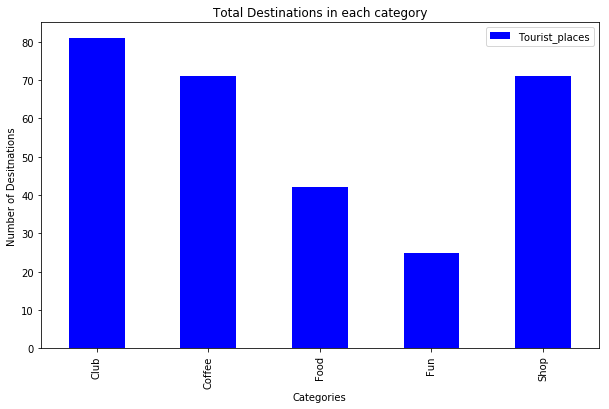

In [38]:
import matplotlib.pyplot as plt

ax = categories.plot(kind='bar',figsize=(10,6), color='blue')
ax.set_title("Total Destinations in each category")
ax.set_xlabel("Categories")
ax.set_ylabel("Number of Desitnations")
ax.set_xticklabels(categories['Category'])

# plt.show()

**Segmenting and Clustering the tourists sights and their neighborhoods based on the categories of the popular nearby destinations.**

In [39]:
final_Berlin['Retrieved_Category'].unique().size

72

In [40]:
final_Berlin.groupby(['Category','Retrieved_Category']).count()

Tourist_places  Latitude  \
Category Retrieved_Category                                                   
Club     Bar                                                    2         2   
         Bike Shop                                              3         3   
         Café                                                   4         4   
         Clothing Store                                         1         1   
         Club House                                             6         6   
         Cocktail Bar                                           2         2   
         Coffee Shop                                            1         1   
         Event Space                                            2         2   
         Gym / Fitness Center                                   7         7   
         Hotel Bar                                              1         1   
         Hotel Pool                                             3         3   
         Indian Restaurant                                      3         3   
         Jewish Restaurant                                      1         1   
         Lounge                                                 1         1   
         Music Venue                                            7         7   
         Nightclub                                             17        17   
         Office                                                 3         3   
         Other Nightlife                                        1         1   
         Rental Car Location                                    1         1   
         Residential Building (Apartment / Condo)               1         1   
         Salon / Barbershop                                     3         3   
         Spa                                                    3         3   
         Steakhouse                                             2         2   
         Sushi Restaurant                                       3         3   
         Travel Lounge                                          1         1   
         University                                             1         1   
         Wine Bar                                               1         1   
Coffee   Bakery                                                 6         6   
         Breakfast Spot                                         2         2   
         Café                                                  13        13   
         Coffee Shop                                           49        49   
         Lounge                                                 1         1   
Food     Asian Restaurant                                       5         5   
         Bar                                                    3         3   
         Burger Joint                                           1         1   
         Egyptian Restaurant                                    1         1   
         Festival                                               3         3   
         Food Court                                             7         7   
         Food Truck                                             3         3   
         German Restaurant                                      4         4   
         Japanese Restaurant                                    3         3   
         Korean Restaurant                                      2         2   
         Sandwich Place                                         6         6   
         Shopping Mall                                          1         1   
         Snack Place                                            1         1   
         Sushi Restaurant                                       1         1   
         Vietnamese Restaurant                                  1         1   
Fun      Adult Boutique                                         1         1   
         Building                                               1         1   
         Clothing Stor

In [41]:
## One hot encoding the 'Retrieved Category' and storing it in the final_Berlin data frame
berlin_cat = pd.get_dummies(final_Berlin[['Retrieved_Category']], prefix = "", prefix_sep = "")

In [42]:
berlin_cat.shape

(290, 72)

In [43]:
final_Berlin['Tourist_places'].size

290

In [44]:
## Copying the 'Tourist_places' column from the data frame final_Berlin to berlin_cat 
berlin_cat['Tourist_places'] = final_Berlin['Tourist_places']

In [45]:
berlin_cat.columns[1]

'Arts & Crafts Store'

In [46]:
## Rearranging the column position of 'Tourist_places'
#cols_arranged = [berlin_cat.columns[-1]] + list(berlin_cat.columns[:-1])

#berlin_cat = berlin_cat[cols_arranged]
berlin_cat.head()

,Adult Boutique,Arts & Crafts Store,Asian Restaurant,Bakery,Bar,Bike Shop,Bookstore,Boutique,Breakfast Spot,Building,Burger Joint,Café,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Lab,Cosmetics Shop,Egyptian Restaurant,Electronics Store,Event Space,Exhibit,Festival,Food Court,Food Truck,Funeral Home,German Pop-Up Restaurant,German Restaurant,Grocery Store,Gym / Fitness Center,Historic Site,Hotel Bar,Hotel Pool,Ice Cream Shop,Indian Restaurant,Japanese Restaurant,Jewish Restaurant,Korean Restaurant,Leather Goods Store,Lounge,Meeting Room,Men's Store,Miscellaneous Shop,Mobile Phone Shop,Music Venue,Nightclub,Non-Profit,None,Office,Optical Shop,Other Nightlife,Real Estate Office,Record Shop,Recording Studio,Rental Car Location,Residential Building (Apartment / Condo),Salon / Barbershop,Sandwich Place,Shoe Store,Shopping Mall,Snack Place,Souvenir Shop,Spa,Sporting Goods Shop,Steakhouse,Sushi Restaurant,Tech Startup,Toy / Game Store,Travel Lounge,University,Vietnamese Restaurant,Wine Bar,Tourist_places
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Alexanderplatz
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Alexanderplatz
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Alexanderplatz
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Alexanderplatz
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Alexanderplatz


Grouping the data by the 12 tourist places of Berlin to get the different categories of the destinations found near the tourist sight.

In [47]:
berlin_destinations = berlin_cat.groupby('Tourist_places').sum().reset_index()

In [48]:
berlin_destinations.head()

,Tourist_places,Adult Boutique,Arts & Crafts Store,Asian Restaurant,Bakery,Bar,Bike Shop,Bookstore,Boutique,Breakfast Spot,Building,Burger Joint,Café,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Lab,Cosmetics Shop,Egyptian Restaurant,Electronics Store,Event Space,Exhibit,Festival,Food Court,Food Truck,Funeral Home,German Pop-Up Restaurant,German Restaurant,Grocery Store,Gym / Fitness Center,Historic Site,Hotel Bar,Hotel Pool,Ice Cream Shop,Indian Restaurant,Japanese Restaurant,Jewish Restaurant,Korean Restaurant,Leather Goods Store,Lounge,Meeting Room,Men's Store,Miscellaneous Shop,Mobile Phone Shop,Music Venue,Nightclub,Non-Profit,None,Office,Optical Shop,Other Nightlife,Real Estate Office,Record Shop,Recording Studio,Rental Car Location,Residential Building (Apartment / Condo),Salon / Barbershop,Sandwich Place,Shoe Store,Shopping Mall,Snack Place,Souvenir Shop,Spa,Sporting Goods Shop,Steakhouse,Sushi Restaurant,Tech Startup,Toy / Game Store,Travel Lounge,University,Vietnamese Restaurant,Wine Bar
0,Alexanderplatz,0,0,2,2,1,0,0,0,0,0,0,1,0,1,1,8,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,6,1,6,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Berlin Hauptbahnhof,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,0,1,0,0,1,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0
2,Berliner Dom,1,1,0,0,0,0,0,1,1,0,0,5,1,0,0,4,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,2,4,1,1,1,2,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Brandenburg Gate,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,Bundestag,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [49]:
berlin_destinations.shape

(12, 73)

### **Clustering the tourists places in 3 clusters, based on the unique categories of nearby destinations and the data is stored in the berlin_destinations data frame**

In [50]:
clusters = 3
berlin_clusters = berlin_destinations.drop('Tourist_places', 1)

In [52]:
kmeans = KMeans(n_clusters = clusters, random_state = 0).fit(berlin_clusters)
kmeans.labels_

array([0, 1, 2, 1, 1, 0, 2, 1, 0, 1, 1, 2], dtype=int32)

In [53]:
berlin_destinations.sum(axis = 1)

0     38
1     17
2     37
3      8
4      7
5     41
6     44
7      6
8     41
9      1
10    12
11    38
dtype: int64

In [54]:
final_berlin_clusters_destinations = pd.DataFrame(columns = ['Tourist_places', 'Cluster', 'Latitude', 'Longitude', 'Total_Destinations'])

In [55]:
final_berlin_clusters_destinations['Tourist_places'] = berlin_destinations['Tourist_places']
final_berlin_clusters_destinations['Cluster'] = kmeans.labels_
final_berlin_clusters_destinations['Latitude'] = df1['Latitude']
final_berlin_clusters_destinations['Longitude'] = df1['Longitude']
final_berlin_clusters_destinations['Total_Destinations'] = berlin_destinations.sum(axis = 1)

In [56]:
final_berlin_clusters_destinations

,Tourist_places,Cluster,Latitude,Longitude,Total_Destinations
0,Alexanderplatz,0,52.521671,13.413278,38
1,Berlin Hauptbahnhof,1,52.519082,13.401094,17
2,Berliner Dom,2,52.524945,13.369661,37
3,Brandenburg Gate,1,52.516280,13.377702,8
4,Bundestag,1,52.520823,13.409421,7
5,Fernsehturm,0,52.508732,13.377048,41
6,Potsdamer Platz,2,52.518653,13.376101,44
7,Reichstag building,1,52.518592,13.376666,6
8,Rotes Rathaus,0,52.518272,13.407831,41
9,Siegessäule,1,52.513017,13.327178,1


In [57]:
### Visualize the 3 clusters of the 12 tourist places based on the categories of the places nearby.

map_ber_clusters = folium.Map(location = [latitude,longitude], zoom_start=10)
colors = ['red', 'blue', 'green', 'yellow','purple']

for lat, lng, place, cluster in zip(final_berlin_clusters_destinations['Latitude'], 
                                    final_berlin_clusters_destinations['Longitude'], 
                                    final_berlin_clusters_destinations['Tourist_places'],
                                    final_berlin_clusters_destinations['Cluster']):
    label = folium.Popup(place, parse_html = True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color=colors[cluster],
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.5).add_to(map_ber_clusters)  
    
map_ber_clusters

**The clusters so formed are not very distinct as each tourist sight is explored with the categories for -- Food, Coffee, Shop, Club and Fun, which leaves all the tourist places to have similar categories of destinations.**

**So, the clusters are formed based on the destinations rather than the categories to which the destinations belong.**

**Visualize the clusters based on their desitnation.**

**The data frame with all the popular destinations is clustered based on the numerical columns --- 'Latitude', 'Longitude', 'Distance'.**

**The data which has the distance <= 500 are only taken into consideration as with the whole data the clusters are heavily overlapping**

In [58]:
## Getting the required columns from the data frame for clustering.

final = final_Berlin[['Place_Name', 'Latitude','Longitude','Place_Distance (in m)']]

In [59]:
final.shape

(290, 4)

In [60]:
## Data with distance <=500
final1 = final[final['Place_Distance (in m)'] <= 500].reset_index(drop = True)
final1.head()

,Place_Name,Latitude,Longitude,Place_Distance (in m)
0,anan - Asia Fine Food,52.521394,13.410380,198
1,Foodcourt,52.518308,13.415845,412
2,SAMUI fine asian food,52.522110,13.413427,49
3,Flemingo Fresh Food Bar,52.521240,13.414249,81
4,Cuccis,52.521444,13.411424,128


In [61]:
final1.shape

(238, 4)

In [62]:
from sklearn.preprocessing import StandardScaler
X = final1.values[:,1:]
cluster_data = StandardScaler().fit_transform(X)
#cluster_data

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [63]:
no = 5
kmeans1 = KMeans(init = 'k-means++', n_clusters = no, random_state = 0).fit(cluster_data)
labels = kmeans1.labels_
labels

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 2, 2, 2, 0, 2, 2, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 2, 1, 0, 1, 2, 2, 2, 0, 1, 2, 0, 0, 0, 0, 0], dtype=int32)

In [64]:
final1['Cluster'] = labels
final1.head()

,Place_Name,Latitude,Longitude,Place_Distance (in m),Cluster
0,anan - Asia Fine Food,52.521394,13.410380,198,1
1,Foodcourt,52.518308,13.415845,412,0
2,SAMUI fine asian food,52.522110,13.413427,49,1
3,Flemingo Fresh Food Bar,52.521240,13.414249,81,1
4,Cuccis,52.521444,13.411424,128,1


In [65]:
map_berlin_clusters = folium.Map(location = [latitude,longitude], zoom_start=12)
colors = ['red', 'blue', 'green', 'yellow','purple','brown','orange','magenta','lightblue','black','darkgreen','maroon']
#final_berlin_clusters_destinations = pd.DataFrame(columns = ['Tourist_places', 'Cluster', 'Latitude', 'Longitude', 'Total_Destinations'])
for lat, lng, place, cluster in zip(final1['Latitude'], 
                                    final1['Longitude'], 
                                    final1['Place_Name'], final1['Cluster']):
    label = folium.Popup(place, parse_html = True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color=colors[cluster],
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.5).add_to(map_berlin_clusters)  
    
map_berlin_clusters
    

In [66]:
final1[(final1['Cluster'] == 1) | (final1['Cluster'] == 2)]

,Place_Name,Latitude,Longitude,Place_Distance (in m),Cluster
0,anan - Asia Fine Food,52.521394,13.410380,198,1
2,SAMUI fine asian food,52.522110,13.413427,49,1
3,Flemingo Fresh Food Bar,52.521240,13.414249,81,1
4,Cuccis,52.521444,13.411424,128,1
5,Coffee Fellows,52.522656,13.409790,260,1
7,snack'n coffee,52.521005,13.411965,115,1
8,Coffee Fellows,52.520379,13.411025,209,1
9,Coffee Shop Inn,52.523385,13.411916,211,1
10,Coffee Shop,52.523166,13.411686,198,1
11,Berlin Coffee,52.521070,13.411037,165,1


**The second and the third clusters are found to be overlapping since the tourist sights are almost very near and also the distance criteria for the exploring the destinations is within the range of 500m, so the closeness of the sights and the distance criteria justifies the overlapping of the two clusters.**